In [3]:
import numpy as np
import matplotlib.pyplot as plt

## 正弦波線形結合のフーリエ変換

(0.1, 0.4)

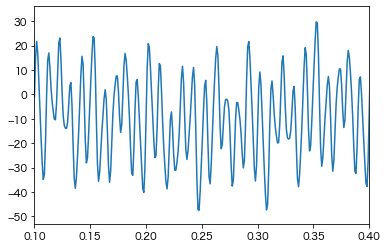

In [4]:
# データの準備
x = np.linspace(0.1,10,10000)
dx = (np.max(x) - np.min(x))/len(x)

# 既知の応答関数（sin, cosの組み合わせ)を作成
def func_sin(x):
    basic = 2*np.pi*x
    f1,f2,f3,f4,f5,f6 = 3,12,35,80,100,190
    
    return 5*np.sin(basic*f1) + 3*np.sin(basic*f2) + 10*np.sin(basic*f3) + 6*np.sin(basic*f4) + 20*np.sin(basic*f5) + 4*np.sin(basic*f6) + 10*np.random.randn()

y = func_sin(x)

# 可視化
plt.plot(x,y)
plt.xlim(0.1,0.4)

(0.0, 200.0)

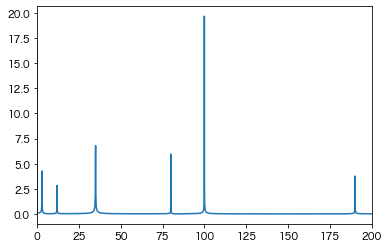

In [5]:
# フーリエ変換

'''
フーリエ変換：非周期の関数を三角関数で近似し、各周波数と強度を取得
'''

# 変換結果
result_fft = np.fft.fft(y)

# 周波数（振動数）の情報を取得を取得
result_freq = np.fft.fftfreq(len(x), d=dx)

# スペクトルの強度を取得
Intensity = np.abs(result_fft/(len(x)/2))

plt.plot(result_freq[:int(len(x)/2)], Intensity[:int(len(x)/2)])
plt.xlim(0,200)

## 冪関数のフーリエ変換

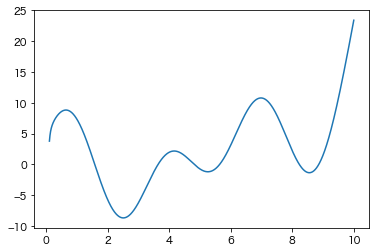

In [6]:
def func_power(x):
    return (0.01/x**2)*np.log(x) + 1e-2*x**2 + 1e-2*np.exp(x**1)/x + 5*np.sin(2*x) + 5*np.cos(x)

y_power = func_power(x)

# 可視化
plt.plot(x,y_power)
# plt.xlim(0,0.1)

(0.0, 5.0)

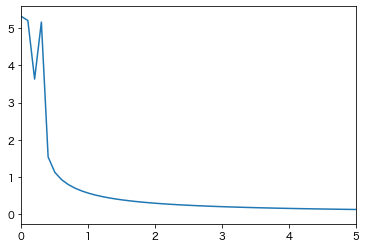

In [7]:
# フーリエ変換
result_fft = np.fft.fft(y_power)

# 周波数の一覧
dx = (np.max(x) - np.min(x))/len(x) # どれくらいの幅で測定しているのかを取得
result_frep = np.fft.fftfreq(len(x),dx)

result_intensity = np.abs(result_fft/(len(x)/2))

plt.plot(result_frep[:int(len(x)/2)], result_intensity[:int(len(x)/2)])
plt.xlim(0,5)

In [8]:
def y_pred(n):
    '''
    yの予測値を返す（長さはyと同じ）
    低周波数帯で元の関数を再現できるのかを確認
    '''
    
    # 低周波数帯の周波数と強度を取得
    low_freq_fft = result_fft[:n]
    
    # 低周波数帯での予測値を算出
    y_pred = np.fft.irfft(low_freq_fft, len(x))
        
    return y_pred

### 10Hz未満の周波数で逆変換

In [13]:
N

5100

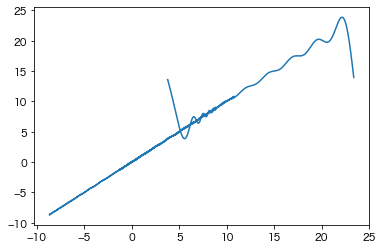

In [12]:
N = len(result_frep[result_frep <= 10])
result_y_pred = y_pred(n=100)
plt.plot(y_power,result_y_pred)

### 20Hz未満の周波数で逆変換

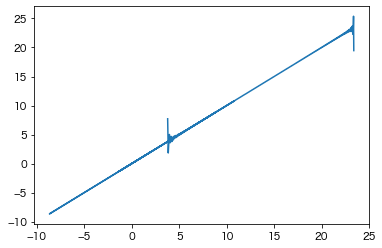

In [37]:
N = len(result_frep[result_frep <= 20])
result_y_pred = y_pred(n=3000)
plt.plot(y_power,result_y_pred)

### 全周波数で逆変換

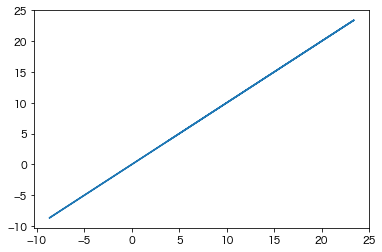

In [38]:
result_y_pred = y_pred(n=len(y_power))
plt.plot(y_power,result_y_pred)

### どの周波数までが重要かを考える

(0.0, 100.0)

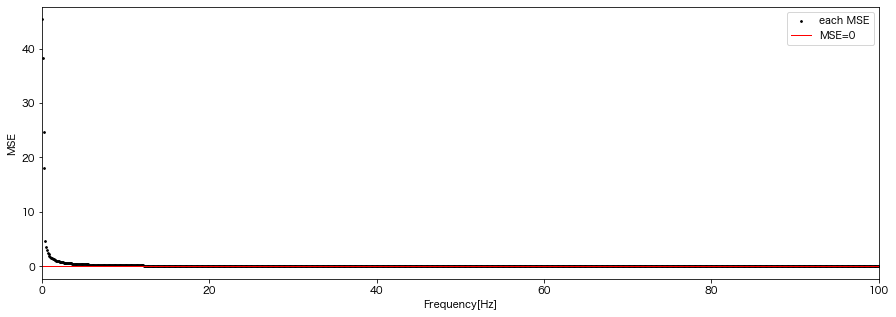

In [40]:
# R2スコアを算出し、それがどこで最小となるかを探索

from sklearn.metrics import mean_squared_error
mse_score_list = []

for i_freq in range(int(len(x)/2)):
    y_pred_temp = y_pred(n=i_freq)
    
    mse = mean_squared_error(y_power, y_pred_temp)
    
    mse_score_list.append(mse)
    
    
plt.figure(figsize=(15,5))
plt.scatter(result_frep[:int(len(x)/2)], mse_score_list, c='k', s=3, label='each MSE')
plt.plot([0,1000000],[0,0],c='r', label='MSE=0',linewidth=1)
plt.legend()
plt.xlabel('Frequency[Hz]')
plt.ylabel('MSE')
plt.xlim(0,100)


# 結論としては、Frequencyが30-100の間まででの逆変換でも意外と元の形を保っている？

'\nやはり30未満の周波数でもある程度は修復可能\n'

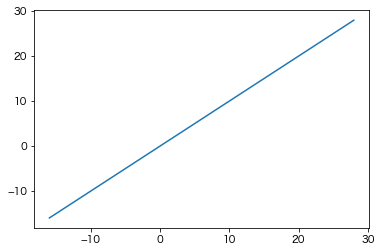

In [25]:
N = len(result_frep[result_frep <= 30])
result_y_pred = y_pred(n=N)
plt.plot(y_power,result_y_pred)
'''
やはり30未満の周波数でもある程度は修復可能
'''